# '01_knn_class.ipynb'


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

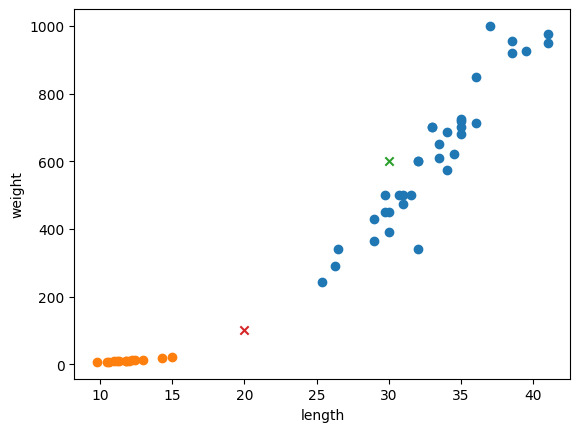

In [4]:
# 산점도가 가장 있는 그대로 보여줄 수 있겠네
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter([30], [600], marker='x')
plt.scatter([20], [100], marker='x')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [7]:
bream_df = pd.DataFrame({
    'l': bream_length,
    'w': bream_weight,
    'c': [1] * len(bream_length)
})

smelt_df = pd.DataFrame({
    'l': smelt_length,
    'w': smelt_weight,
    'c': [0] * len(smelt_length)
})

df = pd.concat([bream_df, smelt_df], ignore_index=True)

df.head()

,l,w,c
0,25.4,242.0,1
1,26.3,290.0,1
2,26.5,340.0,1
3,29.0,363.0,1
4,29.0,430.0,1


In [8]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
X = df[['l', 'w']]
y = df['c']
# .fit() = 학습
kn.fit(X, y)

# .fit() : 이제부터 학습이다

KNeighborsClassifier()

In [9]:
kn.score(X,y)

1.0

In [ ]:
kn.predict([[30,6000],[20,100]])

In [10]:
kn49 = KNeighborsClassifier(n_neighbors=49) # 최인접분류기
kn49.fit(X,y)
kn49.score(X,y)
# 데이터에 도미가 더 많음 -> 뭐가 됐든 다 도미라고 분류 ? 도미,붕어 및 생선분류하는 모델?

0.7142857142857143

## 지도학습(supervised learning) / 비지도 학습(un supervised learning)

지도학습 -> X 입력(input), y 타겟(target) -> 훈련 데이터

Eg. 생선 데이터
- 입력 -> 길이특성, 무게특성
- 타깃 -> 0,1
- 입력 + 타깃 = 훈련 데이터


## 훈련 데이터, 테스트 데이터

In [13]:
# 샘플링 편향
# ## 도미만 학습을 시킴
train_X = df[:35][['l','w']] # 행은 앞에 꺼고 
train_y = df[:35]['c']
## 빙어로 테스트 
test_X = df[35:][['l','w']]
test_y = df[35:]['c']

In [14]:
kn = KNeighborsClassifier()
kn.fit(train_X,train_y)
kn.score(test_X, test_y)

0.0

In [15]:
# 훈련 셋과 테스트 셋을 잘 나눠야 함...
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X,y, random_state=42)


In [19]:
kn.fit(train_X, train_y)
kn.score(test_X,test_y)

1.0

In [ ]:
kn.predict([[20,150]])

/Users/jaehyuntak/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [23]:
distances, indexes = kn.kneighbors([[25, 150]])


/Users/jaehyuntak/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


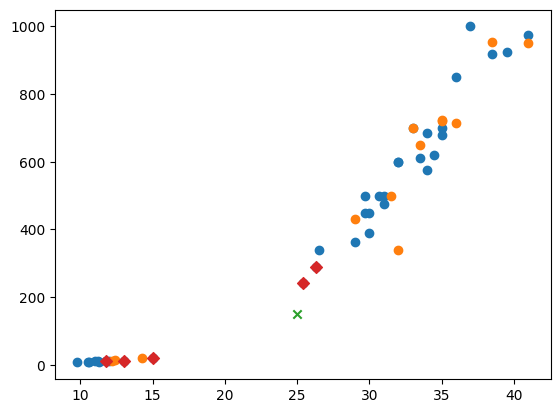

In [ ]:
plt.scatter(train_X['l'], train_X['w'])
plt.scatter(test_X['l'], test_X['w'])
plt.scatter([25],[150], marker = 'x')
plt.scatter(train_X.iloc[indexes[0]]['l'], train_X.iloc[indexes[0]]['w'],marker='D')
plt.show()


## 그래프 보면서 헿갈릴 수 있겠네, 그람이랑 센치랑

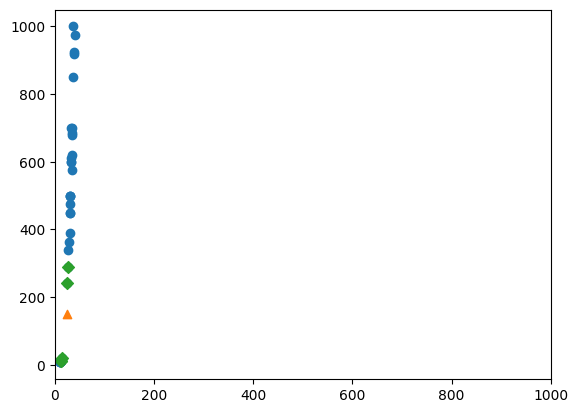

In [ ]:
plt.scatter(train_X[:]['l'],train_X[:]['w'])
plt.scatter(25,150,marker='^')
plt.scatter(train_X.iloc[indexes[0]]['l'], train_X.iloc[indexes[0]]['w'],marker='D')
plt.xlim((0,1000))
plt.show()

# 그래프 보고 정규화 및 전처리해야지

In [28]:
import numpy as np

mean = np.mean(train_X, axis=0)
std = np.std(train_X,axis=0)
scaled_X = (train_X - mean) / std

# 분산, 표준편차 복습해라

/var/folders/1p/yb8d7hmx6wd564h57_td4k140000gn/T/ipykernel_7349/1155677057.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(new[0], new[1], marker='^')


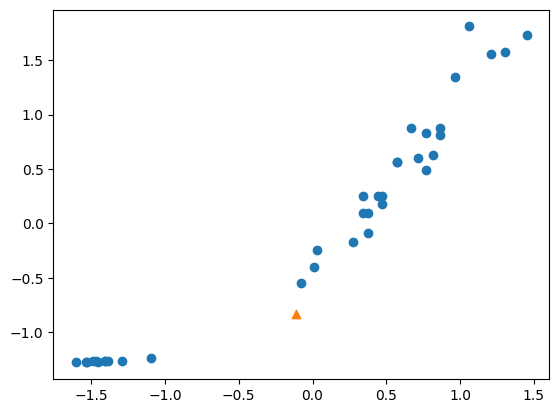

In [34]:
new = ([25,150] - mean) /std
plt.scatter(scaled_X[:]['l'],scaled_X[:]['w'])
plt.scatter(new[0], new[1], marker='^')

In [32]:
# z-score로 바꾸고 학습 
kn.fit(scaled_X, train_y)
test_scaled_X = (test_X - mean) / std
kn.score(test_scaled_X, test_y)

# y는 1,0 범주라서 스케일링이 필요 없음

1.0

In [33]:
kn.predict([new])

/Users/jaehyuntak/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

/Users/jaehyuntak/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/var/folders/1p/yb8d7hmx6wd564h57_td4k140000gn/T/ipykernel_7349/4138014266.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(new[0], new[1], marker='^')


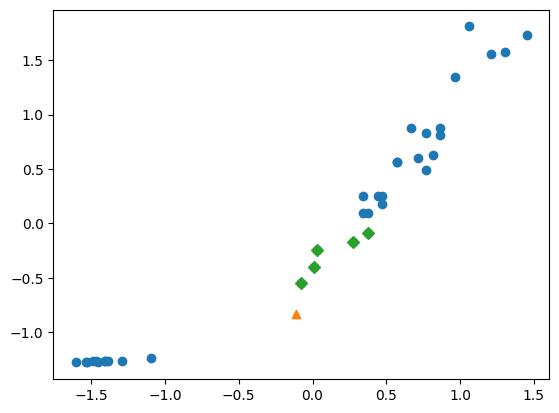

In [ ]:
dist, indexes = kn.kneighbors([new])
plt.scatter(scaled_X[:]['l'], scaled_X[:]['w'])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(scaled_X.iloc[indexes[0]]['l'], scaled_X.iloc[indexes[0]]['w'], marker='D')
plt.show()


# 분류는 거리를 재는거?